## Question 5

In [117]:
import numpy as np
from matplotlib import pyplot as plt
import time

The CDF of the target r.v.: <br>
$F(x) = 10x^3-15x^4+6x^5$ for $  x \in [0,1]        $
<br><br>
The reason that using inverse CDF method is not feasible here is that to inverse a high-order polynomial like this is analytically difficult and numerically costly. Therefore, we use rejection method, leveraging an instrumental variable having the same support as the target r.v..

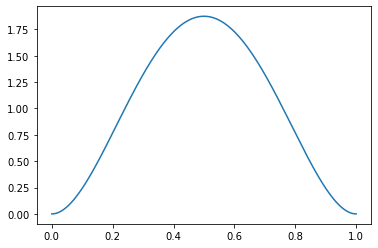

In [118]:
# Examine the shape of the target pdf
x = np.linspace(0,1,10001)
targetPDF = lambda x: 30*(x**2 - 2*x**3 + x**4)
plt.plot(x, targetPDF(x))

In [147]:
# calculate numerically an approximation of the upper bound of TargetPDF(x)/UniformPDF(x):
x = np.linspace(0,1,10001)
# Use uniform[0,1] distribution as the instrumental r.v.
InstruPDF = lambda x: 1

# Calculate the lower bound of c
PDFratio = lambda x: targetPDF(x)/InstruPDF(x)
list_of_pdf_ratio = PDFratio(x)
print(np.max(list_of_pdf_ratio))

1.875


c = 1.9, the performance will be good!

In [148]:
# Algorithm to generate target random variable
def Target(size = 1):
    
    # Set the c, c should be sightly larger than the max(f(x)/g(x))
    c = 1.9
    
    # initialize the container
    result = []
    
    # Create a list of target random variable
    for i in range(size):
        
        
        # Repeat until the uniform random variable is smaller
        while 1:
            
            # Generate instrumental variable
            Instru = np.random.random()
                
            # Generate uniform r.v.
            Uniform = np.random.random()
            
            # Decide whether to abandon the result
            if Uniform <= targetPDF(Instru)/c:
                result.append(Instru)
                break
                
    # Making the return value a np.ndarray
    Array = np.array(result)
    
    return Array

In [149]:
# Draw 1,000,000 random samples
start = time.time()
Sample = Target(1000000)
end = time.time()
print('The time used: ' + str(end - start) + ' seconds')

The time used: 6.1994102001190186 seconds


<ipython-input-150-46520df38807>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


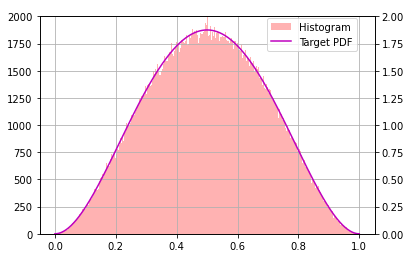

In [150]:
# Plot the histogram
fig, ax = plt.subplots()

ax.hist(Sample, 1000, alpha = 0.3, color = 'r', label = 'Histogram')
ax.set_ylim(0,2000)

ax2 = ax.twinx()
x = np.linspace(0,1,10001)

ax2.plot(x, targetPDF(x), color = 'm', label = 'Target PDF')
ax2.set_ylim(0,2)

ax.grid()
fig.legend(loc = (0.65,0.8))
fig.show()

In [151]:
# print the sample out
print(Sample)

[0.57116299 0.29937077 0.50819649 ... 0.40761979 0.29619792 0.56845254]
